# Görüntüden piksel alma

In [1]:
import cv2
print(cv2.__version__)

4.5.3


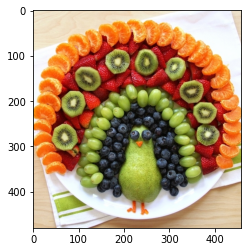

In [3]:
import cv2
import matplotlib.pyplot as plt
image=cv2.imread("ornekResim.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
image.shape

(480, 460, 3)

In [6]:
x=380
y=50
p=image[y,x]
print(p)

[246 251 254]


# Histogram

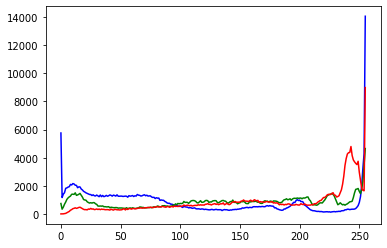

In [2]:
import cv2
import matplotlib.pyplot as plt

image=cv2.imread("ornekResim.jpg")

renk=["b","g","r"]

for i in range(len(renk)):
    hist=cv2.calcHist([image],[i],None,[256],[0,256])
    #print(hist)
    plt.plot(hist,color=renk[i])
    
plt.show()

# Threshold

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread("ornekResim.jpg",0)

ret1,th1=cv.threshold(img,127,255,cv.THRESH_BINARY)
ret2,th2=cv.threshold(img,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th3=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)


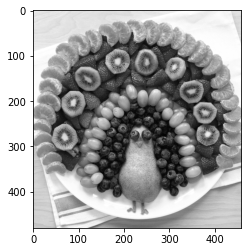

In [16]:
plt.imshow(img,"gray")

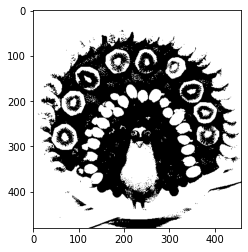

In [17]:
plt.imshow(th1,"gray")

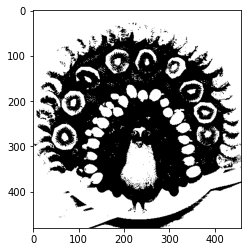

In [18]:
plt.imshow(th2,"gray")

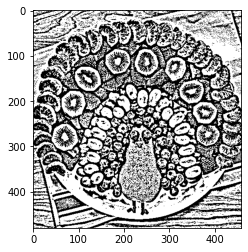

In [21]:
plt.imshow(th3,"gray")

# MLP ile görüntü sınıflandırma

## Ağırlıkların elde edilmesi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [2]:
X=np.load("X.npy")
y=np.load("Y.npy")

In [3]:
print(X.shape)

(2062, 64, 64, 1)


In [4]:
nsamples,nx,ny,channel=X.shape
x=X.reshape((nsamples,nx*ny))

In [5]:
print(x.shape)

(2062, 4096)


In [6]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
mlpc=MLPClassifier(solver="adam",activation="relu",max_iter=2000,random_state=1,hidden_layer_sizes=(400,400,400))
mlpc.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(400, 400, 400), max_iter=2000, random_state=1)

In [10]:
print("score:",mlpc.score(x_test,y_test))

score: 0.7917675544794189


In [11]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
y_pred=mlpc.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
cr=classification_report(y_true,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        40
           1       1.00      0.84      0.91        44
           2       0.82      0.78      0.79        40
           3       1.00      0.88      0.94        42
           4       0.72      0.79      0.75        42
           5       0.83      0.86      0.84        44
           6       0.93      0.68      0.78        37
           7       0.82      0.55      0.66        42
           8       0.77      0.85      0.81        47
           9       0.93      0.80      0.86        35

    accuracy                           0.80       413
   macro avg       0.84      0.80      0.81       413
weighted avg       0.84      0.80      0.81       413



In [13]:
cm=confusion_matrix(y_true,y_pred)
print(cm)

[[40  0  0  0  0  0  0  0  0  0]
 [ 3 37  0  0  1  0  0  1  2  0]
 [ 4  0 31  0  0  0  2  3  0  0]
 [ 0  0  1 37  0  3  0  0  0  1]
 [ 5  0  0  0 33  2  0  0  1  1]
 [ 4  0  0  0  2 38  0  0  0  0]
 [ 4  0  1  0  5  0 25  1  1  0]
 [ 6  0  4  0  4  0  0 23  5  0]
 [ 5  0  1  0  1  0  0  0 40  0]
 [ 1  0  0  0  0  3  0  0  3 28]]


<AxesSubplot:>

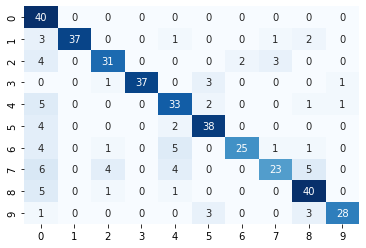

In [14]:
sns.heatmap(cm, annot=True, fmt="", cmap='Blues', cbar=False)

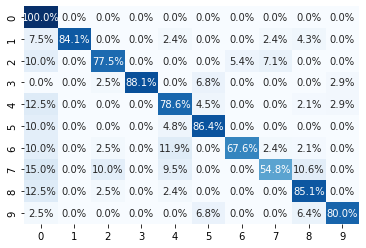

In [15]:
sns.heatmap(cm/cm.sum(axis=1),annot=True,fmt=".1%",cbar=False,cmap="Blues")
plt.show()

## Modelin kaydedilmesi

In [16]:
import joblib

In [17]:
joblib.dump(mlpc,"isaretdili.pkl")

['isaretdili.pkl']

## Modelin yüklenmesi

In [18]:
mlpc=joblib.load("isaretdili.pkl")

## Yeni tahminler

In [19]:
import cv2

In [21]:
xpred_images=[]
imgs=["0.PNG","1.PNG","2.PNG","4.PNG","5.PNG","8.PNG","8_.PNG","9.PNG"]
for im in imgs:
    image=cv2.imread("numbers/"+im,0)
    image=cv2.resize(image,(64,64))
    xpred_images.append(image);

In [23]:
xpred_images=np.array(xpred_images).astype("float32")
xpred_images=xpred_images/255.0

In [25]:
np.save("x_pred",xpred_images)

In [26]:
x_p=np.load("x_pred.npy")
print(x_p.shape);

(8, 64, 64)


In [27]:
nsamples,nx,ny=x_p.shape
x_new=x_p.reshape((nsamples,nx*ny))

In [28]:
print(x_new.shape)

(8, 4096)


In [29]:
y_pred_new=mlpc.predict(x_new)
y_pred_new=np.argmax(y_pred_new,axis=1)

In [30]:
print(y_pred_new)

[0 1 2 8 0 8 8 0]
